In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def true_nc(d):
    return (d/2) * np.log(0.5) - d/4

In [3]:
pk = np.load("Data/NC/Benchd/pk.npy")
ka = np.load("Data/NC/Benchd/ka.npy")
wk = np.load("Data/NC/Benchd/wk.npy")
wk_id = np.load("Data/NC/Benchd/wk_id.npy")
wka = np.load("Data/NC/Benchd/wka.npy")
sir = np.load("Data/NC/Benchd/sir.npz")

In [4]:
d = np.arange(1,56,1)

In [5]:
s_true = true_nc(d)

In [6]:
def benchn_plot(N, pk, ka, wk, wk_id, wka, s_true, sir, save_path):

    fig, ax = plt.subplots(figsize=(8., 6.0))

    colors = {
        "KMED":    "#0072B2",   # blue
        "KAKMED":  "#E69F00",   # orange
        "WKMED":   "#006400",   # deep forest green
        "WKAKMED": "#CC00CC",   # magenta
        "WKID":    "#B8860B",   # dark goldenrod (new)
        "SIR":     "#CC79A7",   # light purple
    }

    # --- KMED ---
    ax.plot(N, pk, label="KMED",
            linestyle="--", linewidth=2.4, color=colors["KMED"])

    # --- KAKMED ---
    ax.plot(N, ka, label="KAKMED",
            linestyle="-.", linewidth=2.4, color=colors["KAKMED"])

    # --- WKMED ---
    ax.plot(N, wk, label="WKMED",
            linestyle="-", linewidth=2.8, color=colors["WKMED"])
    ax.scatter(N, wk, color=colors["WKMED"],
               s=18, marker="o", edgecolor="black", linewidth=0.4)

    # --- WK_ID  ---
    ax.plot(N, wk_id, label="WKMED, $C_{t} = I$",
            linestyle=(0, (1, 1)),            # dense dot
            linewidth=2.6,
            color=colors["WKID"])
    ax.scatter(N, wk_id, color=colors["WKID"],
               s=22, marker="^", edgecolor="black", linewidth=0.4)

    # --- WKAKMED ---
    ax.plot(N, wka, label="WKAKMED",
            linestyle=(0, (5, 2)), linewidth=2.8, color=colors["WKAKMED"])

    # --- True ---
    ax.plot(N, s_true, label="True",
            linestyle="-", linewidth=2.6, color="black")

    # --- SIR ---

    ax.plot(N, sir["mu"], label="SIR",
            linestyle="--", linewidth=2.2, color=colors["SIR"])
    ax.fill_between(N,
                    sir["mu"] - sir["error"],
                    sir["mu"] + sir["error"],
                    color=colors["SIR"], alpha=0.15)

    # Labels
    ax.set_xlabel("d", fontsize=12)
    ax.set_ylabel(r"$\log Z_{1}$", fontsize=12)

    # Grid + ticks
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.tick_params(labelsize=10)

    # Legend
    ax.legend(frameon=False, fontsize=9, ncol=2, handlelength=2)

    fig.tight_layout()
    fig.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()


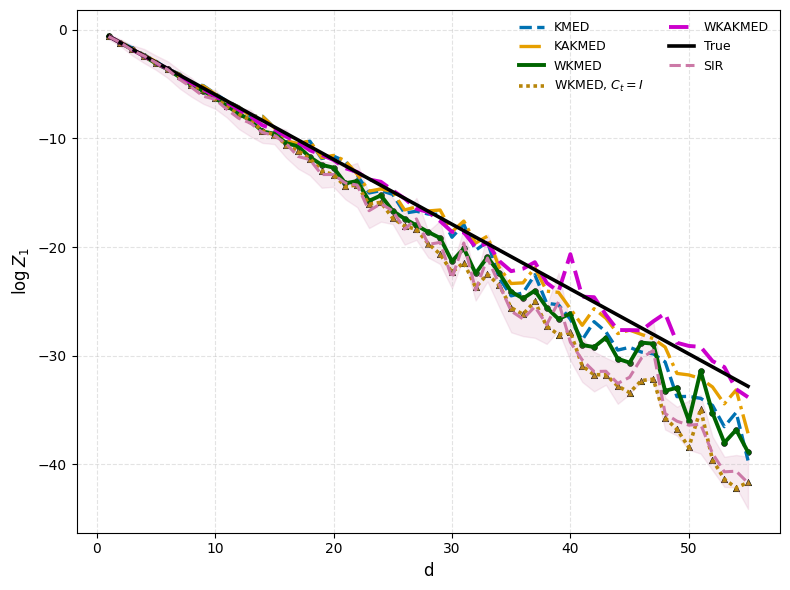

In [7]:
save_path = "Plots/NC/benchd.png"
benchn_plot(d, pk, ka, wk, wk_id, wka, s_true, sir, save_path)